#  Step Function

Solve the advection equation, but using as initial data a step function instead of a Gaussian profile: $u(x, t = 0) = 1$ for $x ∈ [4, 6]$ and $u(x, t = 0) = 0$ in the rest of the domain. 

Compare the results obtained when using the Lax-Friedrichs and the Lax-Wendroff schemes. Use $c_f = 0.5$, $J = 101$, and terminate the evolution at $t = 20$. Plot $u(x, t)$ at different times and the evolution of the $L_2$-norm of $u(x, t)$. Check what happens when changing the number of points and/or
the Courant factor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio.v2 as imageio
from IPython.display import HTML

In [2]:
plt.rcParams.update({
    "text.usetex": True,            # Use LaTeX for text rendering
    "font.family": "serif",         # Use serif fonts (LaTeX default)
    "font.serif": ["Computer Modern Roman"],  # Default LaTeX font
})

In [3]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [9]:
# Define the initial condition
def step_function(x, left_bond, right_bond):
    if ((x >= left_bond) and (x <= right_bond)):
        return 1
    else:
        return 0

x_inf = 4
x_sup = 6
u_initial = np.zeros(len(x))

for i, x_value in enumerate(x):
    u_initial[i] = step_function(x_value, x_inf, x_sup)

## Lax-Friedrichs

In [11]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LaxF=[]
l2norm_LaxF.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

In [12]:
# Create directory to save images IF there isn't one yet
print(os.getcwd())
if not os.path.exists('./images_LaxF_step'):
    os.makedirs('./images_LaxF_step')
os.listdir('./')

C:\Users\lilit\reps\Numerical_relativity\Homework_1


['.ipynb_checkpoints',
 'Advection equation.ipynb',
 'images_FTCS',
 'images_LaxF',
 'images_LaxF_step',
 'images_Leap',
 'images_Leap2',
 'images_LW',
 'movie_FTCS.mp4',
 'movie_LaxF.mp4',
 'movie_Leap.mp4',
 'movie_Leap2.mp4',
 'movie_LW.mp4',
 'Numerical_Relativity_2025_exercise_01.pdf',
 'Untitled.ipynb']

In [13]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current, c = 'darkturquoise')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.savefig('./images_LaxF_step/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the Lax-Friedrichs method
    u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    
    # Update the solution
    u_current = u_next.copy()

    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LaxF.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current, c = 'darkturquoise')
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.xlabel('x', fontsize = 13)
        plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
        plt.grid(alpha = 0.2, c = 'grey')
        plt.savefig('./images_LaxF_step/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

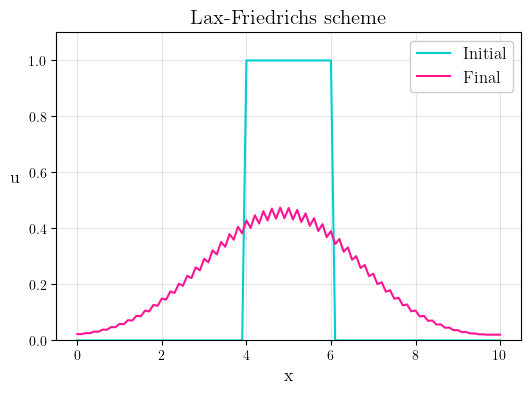

In [14]:
# Plot the final solution
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label='Initial', c = 'darkturquoise')
plt.plot(x, u_current, label='Final', c = 'deeppink')
plt.title('Lax-Friedrichs scheme', fontsize = 15)
#plt.title('Time='+str(round(t,2)), fontsize = 15)
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.legend(fontsize = 12, framealpha = 1)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

In [15]:
# Check your current working directory
print(os.getcwd())

# Set the directory where the images are stored
directory = "./images_LaxF_step/"

files = os.listdir(directory)
files = sorted(files)
print("\nSorted files:", files)
       
# Create the movie
with imageio.get_writer('./movie_LaxF_step.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(os.path.join(directory, file))
        writer.append_data(image)

C:\Users\lilit\reps\Numerical_relativity\Homework_1

Sorted files: ['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190.png', 'fig_00200.png', 'fig_00210.png', 'fig_00220.png', 'fig_00230.png', 'fig_00240.png', 'fig_00250.png', 'fig_00260.png', 'fig_00270.png', 'fig_00280.png', 'fig_00290.png', 'fig_00300.png', 'fig_00310.png', 'fig_00320.png', 'fig_00330.png', 'fig_00340.png', 'fig_00350.png', 'fig_00360.png', 'fig_00370.png', 'fig_00380.png', 'fig_00390.png', 'fig_00400.png']


In [16]:
# Displaying the movie

HTML("""
<div align="middle">
<video width="50%" controls>
      <source src="./movie_LaxF_step.mp4" type="video/mp4">
</video></div>""")

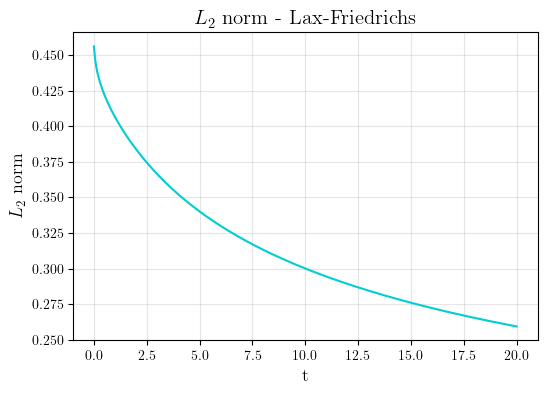

In [17]:
# Plot the l2 norm
plt.figure(figsize=(6, 4))
plt.plot(time, l2norm_LaxF, c = 'darkturquoise')
plt.title('$L_2$ norm - Lax-Friedrichs', fontsize = 15)
plt.xlabel('t', fontsize = 13)
plt.ylabel('$L_2$ norm', fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()